### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_excel('Haryana.xlsx')

In [3]:
df.head()

,Year,Population,Male,Female
0,1901,4623064,2476390,2146674
1,1911,4174677,2274909,1899768
2,1921,4255892,2307985,1947907
3,1931,4559917,2473228,2086689
4,1941,5272829,2821783,2451046


#### Normalizing the Data

In [4]:
scaler = MinMaxScaler()
df[['Population']] = scaler.fit_transform(df[['Population']])

In [5]:
df1 = df[['Year','Population']]

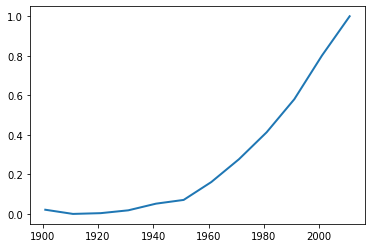

In [6]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)

## Prediction on Population

In [7]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.990912804016443

In [8]:
#training on the whole dataset
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [10]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [11]:
pred

[1.2919099595868602, 1.6096387530677703, 1.97148297397041, 2.3800197065619386]

In [12]:
dfTest['Population'] = pred


In [13]:
df1 = df1.append(dfTest,ignore_index=True)
df1.tail(5)

,Year,Population
11,2011,1.000000
12,2021,1.291910
13,2031,1.609639
14,2041,1.971483
15,2051,2.380020


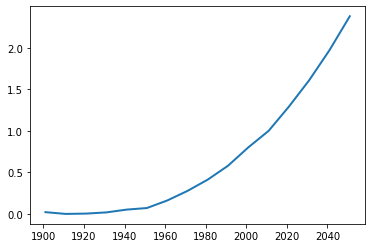

In [14]:
plt.plot(df1['Year'],df1['Population'],linewidth=2.0)


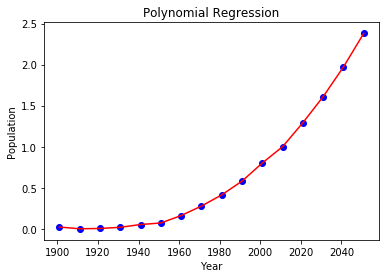

In [15]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show()

### WRT Unproportioned Scale

In [16]:
pred = []
for i in df1['Population']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [17]:
pred

[4623064.0,
 4174677.0,
 4255892.0,
 4559917.0,
 5272829.0,
 5673597.0,
 7590524.0,
 10036431.0,
 12922119.0,
 16463648.0,
 21144564.0,
 25351462.0,
 31533176.0,
 38261651.0,
 45924348.0,
 54575843.0]

In [18]:
df1['Population'] = pred


In [19]:
df1

,Year,Population
0,1901,4623064.0
1,1911,4174677.0
2,1921,4255892.0
3,1931,4559917.0
4,1941,5272829.0
5,1951,5673597.0
6,1961,7590524.0
7,1971,10036431.0
8,1981,12922119.0
9,1991,16463648.0


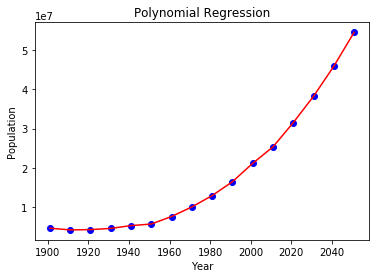

In [20]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Population'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Population'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Population') 
  
plt.show() 

### Male Population

In [21]:
scaler = MinMaxScaler()
df[['Male']] = scaler.fit_transform(df[['Male']])

In [22]:
df2 = df[['Year','Male']]
df2

,Year,Male
0,1901,0.017958
1,1911,0.000000
2,1921,0.002948
3,1931,0.017676
4,1941,0.048742
5,1951,0.067443
6,1961,0.159350
7,1971,0.276487
8,1981,0.413088
9,1991,0.584017


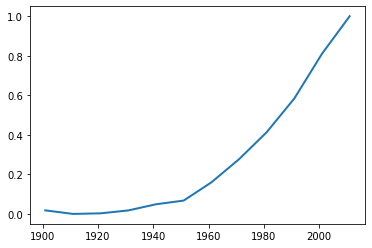

In [23]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)


In [24]:
#train-test set creation
X = df1['Year'].values.reshape(-1,1)
y = df1['Population'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9986044468658952

In [25]:
#training on the whole dataset
X = df2['Year'].values.reshape(-1,1)
y = df2['Male'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [27]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [28]:
pred

[1.296232693201091, 1.6140430478058079, 1.9755330645612048, 2.383193757834306]

In [29]:
dfTest['Male'] = pred

In [30]:
df2 = df2.append(dfTest,ignore_index=True)
df2

,Year,Male
0,1901,0.017958
1,1911,0.000000
2,1921,0.002948
3,1931,0.017676
4,1941,0.048742
5,1951,0.067443
6,1961,0.159350
7,1971,0.276487
8,1981,0.413088
9,1991,0.584017


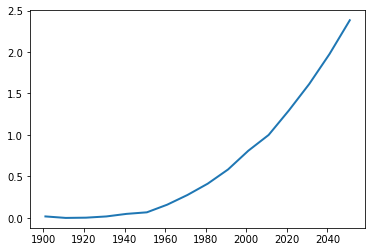

In [31]:
plt.plot(df2['Year'],df2['Male'],linewidth=2.0)

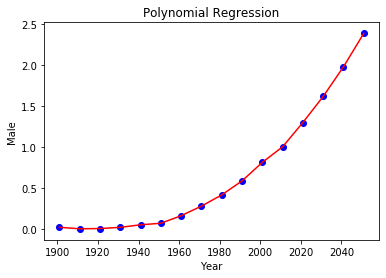

In [32]:
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

#### WRT UNSCALED MALE

In [33]:
pred = []
for i in df2['Male']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [34]:
pred

[2476390.0,
 2274909.0,
 2307985.0,
 2473228.0,
 2821783.0,
 3031612.0,
 4062787.0,
 5377044.0,
 6909679.0,
 8827474.0,
 11363953.0,
 13494734.0,
 16818413.0,
 20384190.0,
 24440044.0,
 29013926.0]

In [35]:
df2['Male'] = pred
df2

,Year,Male
0,1901,2476390.0
1,1911,2274909.0
2,1921,2307985.0
3,1931,2473228.0
4,1941,2821783.0
5,1951,3031612.0
6,1961,4062787.0
7,1971,5377044.0
8,1981,6909679.0
9,1991,8827474.0


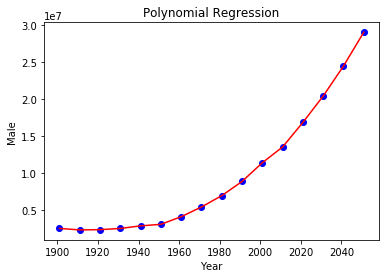

In [36]:
# Visualising the Polynomial Regression results 
plt.scatter(df2['Year'], df2['Male'], color = 'blue') 
  
plt.plot(df2['Year'], df2['Male'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Male') 
  
plt.show()

### Female Population

In [37]:
scaler = MinMaxScaler()
df[['Female']] = scaler.fit_transform(df[['Female']])

In [38]:
df3 = df[['Year','Female']]
df3.head()

,Year,Female
0,1901,0.024797
1,1911,0.000000
2,1921,0.004835
3,1931,0.018773
4,1941,0.055366


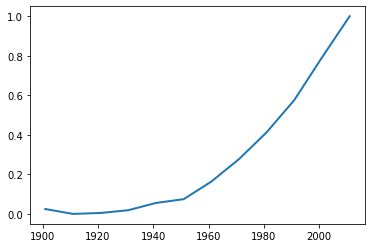

In [39]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

In [40]:
#train-test set creation
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X_train) 
X_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)
lin2.score(X_test,y_test)

0.9966183127193292

In [41]:
#train on whole dataset
X = df3['Year'].values.reshape(-1,1)
y = df3['Female'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
dfTest = pd.DataFrame({'Year':[2021,2031,2041,2051]})

In [43]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [44]:
pred

[1.2870389634521189, 1.6046758512328552, 1.9669192008567506, 2.376443082937726]

In [45]:
dfTest['Female'] = pred

In [46]:
df3 = df3.append(dfTest,ignore_index=True)
df3.tail(5)

,Year,Female
11,2011,1.000000
12,2021,1.287039
13,2031,1.604676
14,2041,1.966919
15,2051,2.376443


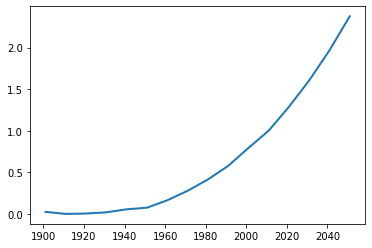

In [47]:
plt.plot(df3['Year'],df3['Female'],linewidth=2.0)

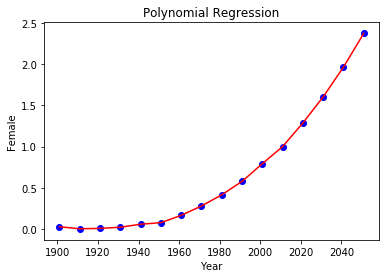

In [48]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

# WRT Unscaled Population

In [49]:
pred = []
for i in df3['Female']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [50]:
pred

[2146674.0,
 1899768.0,
 1947907.0,
 2086689.0,
 2451046.0,
 2641985.0,
 3527737.0,
 4659387.0,
 6012440.0,
 7636174.0,
 9780611.0,
 11856728.0,
 14714763.0,
 17877461.0,
 21484304.0,
 25561917.0]

In [51]:
df3['Female'] = pred

In [52]:
df3

,Year,Female
0,1901,2146674.0
1,1911,1899768.0
2,1921,1947907.0
3,1931,2086689.0
4,1941,2451046.0
5,1951,2641985.0
6,1961,3527737.0
7,1971,4659387.0
8,1981,6012440.0
9,1991,7636174.0


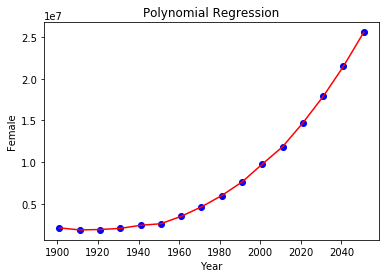

In [53]:
# Visualising the Polynomial Regression results 
plt.scatter(df3['Year'], df3['Female'], color = 'blue') 
  
plt.plot(df3['Year'], df3['Female'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Female') 
  
plt.show() 

In [54]:
df4 = pd.concat([df1,df2,df3], axis =1)

In [55]:
df4

,Year,Population,Year,Male,Year,Female
0,1901,4623064.0,1901,2476390.0,1901,2146674.0
1,1911,4174677.0,1911,2274909.0,1911,1899768.0
2,1921,4255892.0,1921,2307985.0,1921,1947907.0
3,1931,4559917.0,1931,2473228.0,1931,2086689.0
4,1941,5272829.0,1941,2821783.0,1941,2451046.0
5,1951,5673597.0,1951,3031612.0,1951,2641985.0
6,1961,7590524.0,1961,4062787.0,1961,3527737.0
7,1971,10036431.0,1971,5377044.0,1971,4659387.0
8,1981,12922119.0,1981,6909679.0,1981,6012440.0
9,1991,16463648.0,1991,8827474.0,1991,7636174.0
